In [1]:
# Utilizamos JupyterLab para simular un perceptron.
# Utilizaremos el famoso datset iris  (https://www.kaggle.com/uciml/iris)

# The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic 
# Problems, and can also be found on the UCI Machine Learning Repository.

# En esta famosa base de datos, tenemos 50 instancias con tres atributos que representan la clase a la cual
# pertenece la flor. Una especie de flor es linealmente separable de las otras dos, pero las otras dos no son
# linealmente separable entre ellas!

# En las columnas tenemos.

# Id
# SepalLengthCm
# SepalWidthCm
# PetalLengthCm
# PetalWidthCm
# Species variable clase!



# Instalacion de paquetes y dependencias (esto debe ejecutarse en el terminal)
# pip install keras
# pip install tensorflow
# pip install numpy
# pip install scipy

# De todas formas, si esta con ANACONDA, sugiero instalar tensorflow desde la aplicación anaconda. 
# Si numpy y scipy no están instaladas, hacerlo via anaconda.

In [1]:
# Carga de paquetes y dependencias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

In [2]:
# Carga de los datos
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

from sklearn.datasets import load_iris
data = load_iris()




In [3]:
#print(data)

# vemos en las columnas el SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
# y en target, la variable clase: 0 (setosa), 1 (versicolor), 2 (virginica).

print(data.data)
#print(data.target)

# Recurso adicional:
# https://www.kaggle.com/zahoorahmad/tensorflow-and-keras-on-iris-dataset

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
# seleccionamos los atributos de entrada X  y la clase Y

X = data.data
Y = data.target

In [5]:
#len(X)
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
# Ahora creamos el modelo y agregamos el perceptron, es cual es una Dense layer

model = Sequential()
# incializamos así:
# model.add(Dense(units = 1, activation='hard_sigmoid'))

#model.add(Dense(1, input_shape=(8,), activation=hard_sigmoid, kernel_initializer='glorot_uniform'))
model.add(Dense(1, input_shape=(4,), activation='hard_sigmoid', kernel_initializer='random_uniform'))

# Ahora compilamos el modelo y lo inicializamos
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# hacemos fit de datos en este psudo perceptron (entrenamiento).
# Presentamos los datos a nuestro pseudo perceptron. Esto le dice a Keras que comience el proceso de 
# entrenamiento.
    
history = model.fit(X, Y, epochs=225, batch_size=25, verbose=1, validation_split=0.2)


Train on 120 samples, validate on 30 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/225
120/120 [==============================] - 1s 5ms/sample - loss: 0.6981 - acc: 0.4167 - val_loss: 0.7411 - val_acc: 0.0000e+00
Epoch 2/225
120/120 [==============================] - 0s 118us/sample - loss: 0.6807 - acc: 0.4750 - val_loss: 0.6436 - val_acc: 0.0000e+00
Epoch 3/225
120/120 [==============================] - 0s 135us/sample - loss: 0.6604 - acc: 0.8250 - val_loss: 0.5477 - val_acc: 0.0000e+00
Epoch 4/225
120/120 [==============================] - 0s 125us/sample - loss: 0.6408 - acc: 0.7333 - val_loss: 0.4542 - val_acc: 0.0000e+00
Epoch 5/225
120/120 [==============================] - 0s 120us/sample - loss: 0.6239 - acc: 0.4167 - val_loss: 0.3598 - val_acc: 0.0000e+00
Epoch 6/225
120/120 [==============================] - 0s 135us/sample - loss: 0.6069 - acc: 0.4167 - val_loss: 0.2664 - val_acc: 0.0000e+00
Epoch 7/225
120/120 [==============================] - 0s 114us

Epoch 56/225
120/120 [==============================] - 0s 110us/sample - loss: -1.4008 - acc: 0.4167 - val_loss: -11.8777 - val_acc: 0.0000e+00
Epoch 57/225
120/120 [==============================] - 0s 109us/sample - loss: -1.4076 - acc: 0.4167 - val_loss: -11.8934 - val_acc: 0.0000e+00
Epoch 58/225
120/120 [==============================] - 0s 100us/sample - loss: -1.4833 - acc: 0.4167 - val_loss: -11.9104 - val_acc: 0.0000e+00
Epoch 59/225
120/120 [==============================] - 0s 110us/sample - loss: -1.4850 - acc: 0.4167 - val_loss: -11.9238 - val_acc: 0.0000e+00
Epoch 60/225
120/120 [==============================] - 0s 110us/sample - loss: -1.4874 - acc: 0.4167 - val_loss: -11.9349 - val_acc: 0.0000e+00
Epoch 61/225
120/120 [==============================] - 0s 112us/sample - loss: -1.4906 - acc: 0.4167 - val_loss: -11.9432 - val_acc: 0.0000e+00
Epoch 62/225
120/120 [==============================] - 0s 116us/sample - loss: -1.4916 - acc: 0.4167 - val_loss: -11.9581 - val_a

120/120 [==============================] - 0s 116us/sample - loss: -1.5798 - acc: 0.4167 - val_loss: -12.1433 - val_acc: 0.0000e+00
Epoch 113/225
120/120 [==============================] - 0s 107us/sample - loss: -1.5799 - acc: 0.4167 - val_loss: -12.1493 - val_acc: 0.0000e+00
Epoch 114/225
120/120 [==============================] - 0s 103us/sample - loss: -1.5802 - acc: 0.4167 - val_loss: -12.1538 - val_acc: 0.0000e+00
Epoch 115/225
120/120 [==============================] - 0s 104us/sample - loss: -1.5804 - acc: 0.4167 - val_loss: -12.1581 - val_acc: 0.0000e+00
Epoch 116/225
120/120 [==============================] - 0s 108us/sample - loss: -1.5805 - acc: 0.4167 - val_loss: -12.1649 - val_acc: 0.0000e+00
Epoch 117/225
120/120 [==============================] - 0s 111us/sample - loss: -1.5808 - acc: 0.4167 - val_loss: -12.1688 - val_acc: 0.0000e+00
Epoch 118/225
120/120 [==============================] - 0s 114us/sample - loss: -1.5810 - acc: 0.4167 - val_loss: -12.1745 - val_acc: 0.0

120/120 [==============================] - 0s 112us/sample - loss: -1.7740 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 169/225
120/120 [==============================] - 0s 109us/sample - loss: -1.7742 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 170/225
120/120 [==============================] - 0s 122us/sample - loss: -1.7744 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 171/225
120/120 [==============================] - 0s 120us/sample - loss: -1.7746 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 172/225
120/120 [==============================] - 0s 113us/sample - loss: -1.7748 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 173/225
120/120 [==============================] - 0s 106us/sample - loss: -1.7749 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 174/225
120/120 [==============================] - 0s 106us/sample - loss: -1.7751 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0

120/120 [==============================] - 0s 109us/sample - loss: -1.8633 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00
Epoch 225/225
120/120 [==============================] - 0s 111us/sample - loss: -1.8638 - acc: 0.4167 - val_loss: -15.9424 - val_acc: 0.0000e+00


Text(0, 0.5, 'Accuracy')

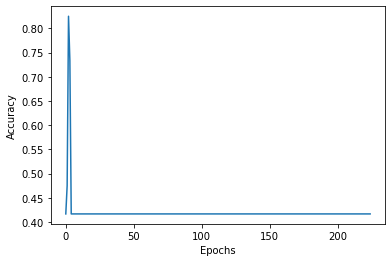

In [8]:
# Veamos cómo se desarrolla el accuracy en las iteraciones

import matplotlib.pyplot as plt #cargamos paquete para graficar

epochs = range(len(history.epoch))  #creamos un vector rango de 0 a 255

plt.figure()
plt.plot(epochs, history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

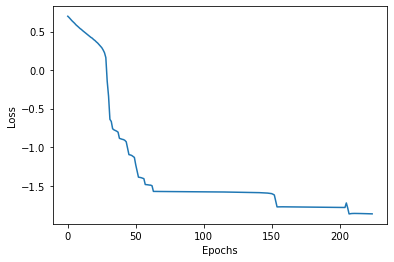

In [9]:
# Veamos un plot de la funcion de perdida a traves de las iteraciones

plt.figure()
plt.plot(epochs, history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [10]:
# recuperemos los pesos

#extract weights and bias from model
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

w1 = weights[0][0] #a
w2 = weights[1][0] #b
w3 = weights[2][0] #c
b = biases[0]      #d

In [11]:
# vamos a tratar de graficar el plano discriminador del perceptron:

# construir hiperplano ax + by + cz = d
a,b,c,d = w1,w2,w3,b

# tomemos como eje x el SepalLengthCm

x_min = data.data[:,0].min()
x_max = data.data[:,0].max()

#x_min = ds.BMI.min()
#x_max = ds.BMI.max()

x = np.linspace(x_min, x_max, 100)

# tomemos como eje y el SepalWidthCm
y_min = data.data[:,1].min()
y_max = data.data[:,1].max()


#y_min = ds.DiabetesPedigreeFunction.min()
#y_max = ds.DiabetesPedigreeFunction.max()

y = np.linspace(y_min, y_max, 100)


Xs,Ys = np.meshgrid(x,y)
Zs = (d - a*Xs - b*Ys) / c

In [12]:
Zs

array([[-2.85737209, -2.88006591, -2.90275973, ..., -5.05867289,
        -5.08136672, -5.10406054],
       [-2.86768305, -2.89037687, -2.91307069, ..., -5.06898385,
        -5.09167768, -5.1143715 ],
       [-2.87799401, -2.90068783, -2.92338165, ..., -5.07929481,
        -5.10198864, -5.12468246],
       ...,
       [-3.85753521, -3.88022903, -3.90292286, ..., -6.05883602,
        -6.08152984, -6.10422366],
       [-3.86784617, -3.89053999, -3.91323382, ..., -6.06914698,
        -6.0918408 , -6.11453462],
       [-3.87815713, -3.90085095, -3.92354478, ..., -6.07945794,
        -6.10215176, -6.12484558]])

Text(0.5, 0, 'PetalLengthCm')

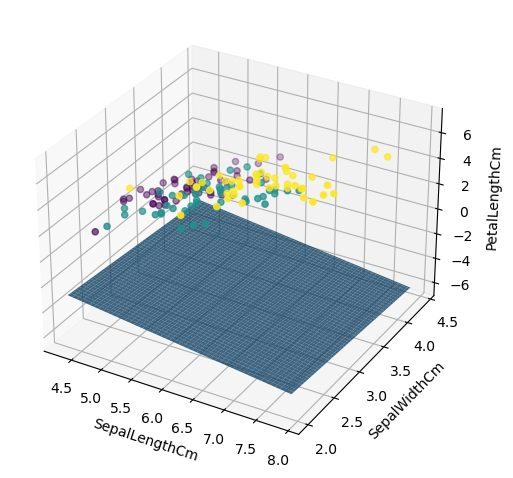

In [14]:
# ahora graficamos

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting in jupyterLan online



#visualize 3d scatterplot with hyperplane
fig = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')

ax.plot_surface(Xs, Ys, Zs, alpha=0.8)

ax.scatter(data.data[:,0], data.data[:,1], data.data[:,2], c=data.target)
#ax.scatter(ds.BMI, ds.DiabetesPedigreeFunction, ds.Glucose, c=ds.Outcome)

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('PetalLengthCm')